In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import tensorflow as tf
from matplotlib.pyplot import bar_label
from tensorflow.keras import Sequential, Model


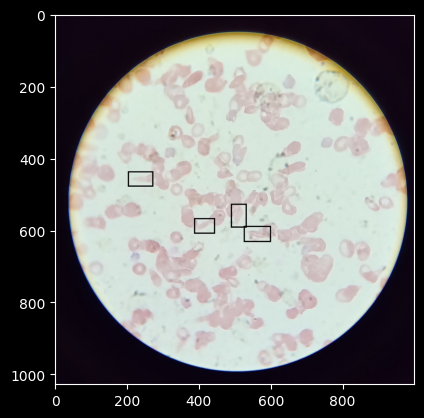

In [13]:
IMG_DIR = "/Scikle/"
sample_img = "Scikle/Positive/Labelled/1.jpg"
image = plt.imread(sample_img)
plt.imshow(image)

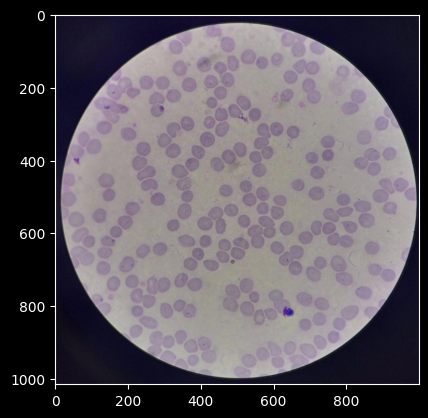

In [14]:
import matplotlib.pyplot as plt
neg_img = "Scikle/Negative/Clear/1.jpg"
image_neg = plt.imread(neg_img)
plt.imshow(image_neg)

569


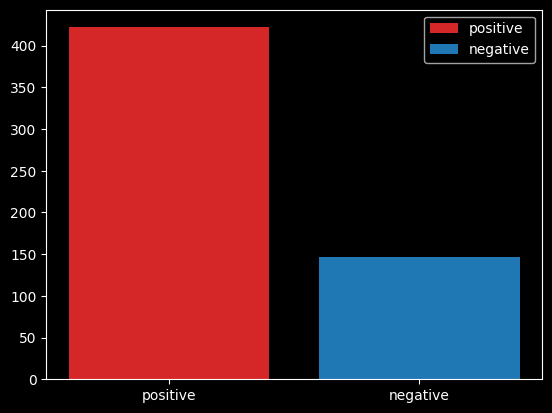

In [20]:
import os
import matplotlib.pyplot as plt
positive_len = len(os.listdir("Scikle/Positive/Labelled/"))
negative_len = len(os.listdir("Scikle/Negative/Clear"))
total_image = positive_len + negative_len
print(total_image)
bar_labels = ["positive", "negative"]
bar_colors = ['tab:red', 'tab:blue']
counts = [positive_len, negative_len]
plt.bar(bar_labels, counts, color=bar_colors, label= bar_labels)
plt.legend()
plt.show()

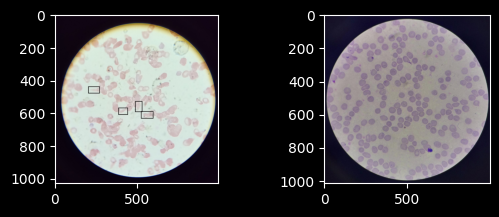

In [16]:
import matplotlib.pyplot as plt
neg_img = "Scikle/Negative/Clear/1.jpg"
image_neg = plt.imread(neg_img)
sample_img = "Scikle/Positive/Labelled/1.jpg"
# image = plt.imread(sample_img)
# plt.imshow(image)
plt.subplot(2, 2, 1)
plt.imshow(image)
plt.subplot(2, 2, 2)
plt.imshow(image_neg)


In [1]:
import pandas as pd


In [4]:
df = pd.DataFrame(columns=['Image dir', 'Label'])

In [5]:
df

,Image dir,Label


In [7]:
import os
import cv2
import numpy as np
import re
IMAGES = []
LABELS = []

positive_imgae_dir = "Scikle/Positive/Labelled/"
negative_image_dir = "Scikle/Negative/Clear/"
for file_dir, _, files in os.walk(positive_imgae_dir):
    for file in files:
        img_file = os.path.join(file_dir, file)
        image_list = cv2.imread(img_file)
        image_resized = cv2.resize(image_list, (255, 255))
        IMAGES.append(image_resized)
        LABELS.append(1)

for file_dir, _, files in os.walk(negative_image_dir):
    for file in files:
        image_file = os.path.join(file_dir, file)
        images = cv2.imread(image_file)
        image_resized = cv2.resize(images, (255, 255))
        IMAGES.append(image_resized)
        LABELS.append(0)

IMAGES = np.array(IMAGES)
IMAGES.shape

(569, 255, 255, 3)

In [8]:
IMAGES[0]

array([[[19,  5, 17],
        [19,  5, 17],
        [19,  5, 17],
        ...,
        [21,  7, 19],
        [21,  7, 19],
        [21,  7, 19]],

       [[19,  5, 17],
        [19,  5, 17],
        [19,  5, 17],
        ...,
        [21,  7, 19],
        [21,  6, 19],
        [21,  7, 19]],

       [[19,  5, 17],
        [19,  5, 17],
        [18,  4, 16],
        ...,
        [21,  7, 19],
        [22,  7, 20],
        [22,  8, 19]],

       ...,

       [[16,  3, 11],
        [16,  3, 11],
        [16,  3, 11],
        ...,
        [18,  4, 15],
        [18,  4, 16],
        [18,  4, 15]],

       [[17,  4, 12],
        [16,  3, 11],
        [16,  3, 11],
        ...,
        [18,  4, 15],
        [18,  5, 13],
        [18,  5, 13]],

       [[16,  3, 11],
        [16,  3, 11],
        [15,  2, 10],
        ...,
        [19,  5, 16],
        [18,  5, 13],
        [17,  4, 12]]], shape=(255, 255, 3), dtype=uint8)

Text(0.5, 1.0, 'Positie')

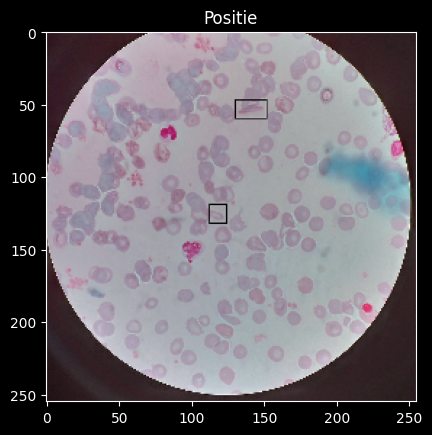

In [10]:
import matplotlib.pyplot as plt
sample = IMAGES[100]
plt.imshow(sample)
plt.title("Positie")


In [22]:
x = IMAGES / 255
y = LABELS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, np.array(y), random_state=42, stratify=np.array(y), test_size=0.2, shuffle=True)
train_x = x_train.reshape(len(x_train), -1)
test_x = x_test.reshape(len(x_test), -1)
train_x.shape

(455, 195075)

In [23]:
logistic = LogisticRegression(random_state=42, max_iter=500)
logistic.fit(train_x, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


Accuracy:  0.8157894736842105
Precision:  0.8588235294117647
Recall:  0.8902439024390244
F1:  0.874251497005988
Confusion Matrix:  [[20 12]
 [ 9 73]]
Classification Report:                precision    recall  f1-score   support

           0       0.69      0.62      0.66        32
           1       0.86      0.89      0.87        82

    accuracy                           0.82       114
   macro avg       0.77      0.76      0.76       114
weighted avg       0.81      0.82      0.81       114



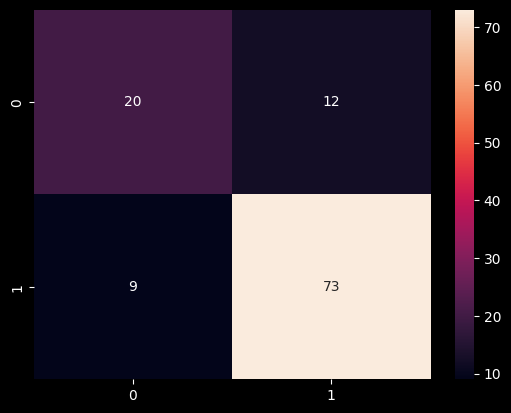

In [30]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
def report(pred, test):
    print("Accuracy: ", accuracy_score(pred, test))
    print("Precision: ", precision_score(pred, test))
    print("Recall: ", recall_score(pred, test))
    print("F1: ", f1_score(pred, test))
    print("Confusion Matrix: ", confusion_matrix(pred, test))
    print("Classification Report: ", classification_report(pred, test))
    sns.heatmap(confusion_matrix(pred, test), annot=True, fmt="d")

predict = logistic.predict(test_x)
report(predict, y_test)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Confusion Matrix:  [[118   0]
 [  0 337]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       337

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



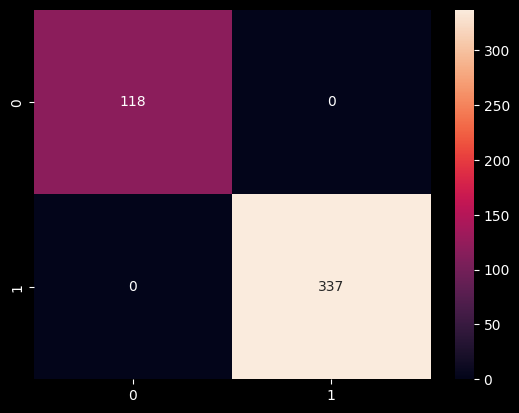

In [31]:
predict_with_test = logistic.predict(train_x)
report(predict_with_test, y_train)

In [33]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
model = Sequential()
image_width, image_height = 255, 255
input_shape = (image_width, image_height, 3)
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


C:\Users\LENOVO\PycharmProjects\SickleCell\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 254, 254, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,936,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,949,185 (15.06 MB)

 Trainable params: 3,949,185 (15.06 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model_check = keras.callbacks.ModelCheckpoint(
    filepath='model.keras',
    monitor='val_loss',
    save_best_only=True
)

In [41]:
history = model.fit(x_train, y_train, epochs=10, callbacks=[model_check], validation_data=(x_test, y_test))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 299ms/step - accuracy: 0.6967 - loss: 0.8212 - val_accuracy: 0.7456 - val_loss: 0.5670
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 302ms/step - accuracy: 0.7407 - loss: 0.6179 - val_accuracy: 0.7456 - val_loss: 0.5460
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step - accuracy: 0.7407 - loss: 0.5074 - val_accuracy: 0.7982 - val_loss: 0.4269
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 279ms/step - accuracy: 0.8154 - loss: 0.3194 - val_accuracy: 0.9649 - val_loss: 0.1908
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.8989 - loss: 0.1684 - val_accuracy: 0.9825 - val_loss: 0.1078
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - accuracy: 0.9099 - loss: 0.1503 - val_accuracy: 1.0000 - val_loss: 0.1006
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 249ms/step - accuracy: 0.9802 - loss: 0.1237 - val_accuracy: 0.9912 - val_loss: 0.0720
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - accuracy: 0.9648 - loss: 0.1164 - val_accuracy: 1.

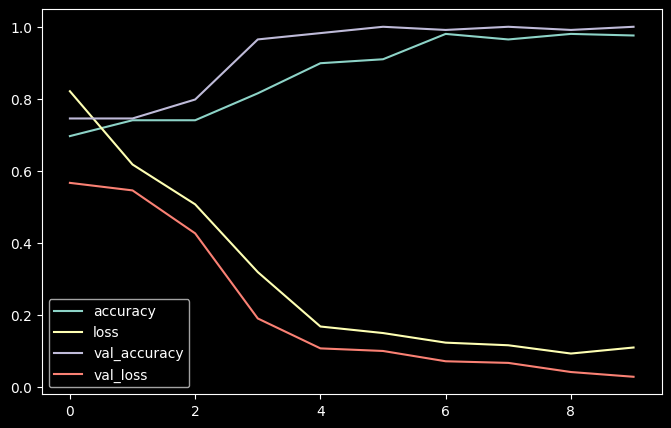

In [42]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [43]:
model = keras.models.load_model('model.keras')

In [45]:
predictions = np.round(model.predict(x_test))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1:  1.0
Confusion Matrix:  [[29  0]
 [ 0 85]]
Classification Report:                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        29
         1.0       1.00      1.00      1.00        85

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

[[1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]


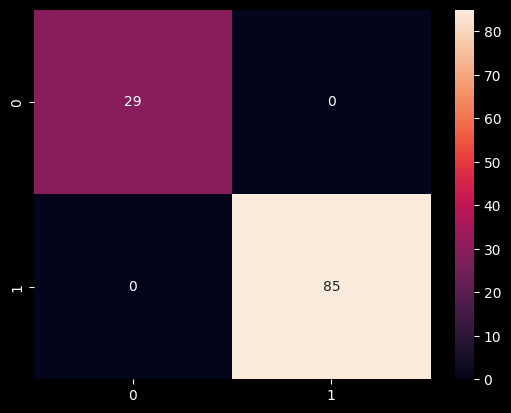

In [47]:
report(predictions, y_test)
print(predictions)